#IMPORT


In [ ]:
from os import listdir
import os
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import wave
import struct
import librosa
import librosa.display
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, LeaveOneOut
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from tensorflow import keras
import csv
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, confusion_matrix
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Tạo dataframe ngang

In [ ]:

def findCSV_filename(path_to_dir, suffix=".csv"):
    filenames = os.listdir(path_to_dir)
    return sorted([filename for filename in filenames if filename.endswith(suffix)])


def getProfile_id(filenames):
    profile_id = []
    for item in filenames:
        for i in range(500):
            profile_id.append(item[:4])
    return profile_id

def getGait_status(filenames):
    gaitStatus = []
    for item in filenames:
        for i in range(500):
            gaitStatus.append(item[4:6])
    return gaitStatus

def createDataframe(filenames):
    i = 1
    df = pd.read_csv(os.path.join("/content/drive/MyDrive/DATA/fulldataset/fuldataset", filenames[0]))
    while i < len(filenames):
        df_temporary = pd.read_csv(os.path.join("/content/drive/MyDrive/DATA/fulldataset/fuldataset", filenames[i]))
        df = pd.concat([df, df_temporary]).reset_index(drop=True)
        i += 1
    return df

def insertColumns(df, gaitStatus, profile_id):
    df['Gait_Status'] = gaitStatus
    df['Profile_ID'] = profile_id
    return df

def createHorizontalDataframe(df, filenames):
    """
    Cria um Dataframe horizontal com base no dataframe vertical.
    """

    profile_id=[]

    for item in filenames:
        profile_id.append(item[:4])

    gaitStatus=[]
    for item in filenames:
        gaitStatus.append(item[4:6])


    xac = []
    for i in range(500):
        xac.append("Xac{:0>3}".format(i)) # xac = [ Xac000, Xac001, ... , Xacc499]
    yac = []
    for i in range(500):
        yac.append("Yac{:0>3}".format(i)) # yac = [ Yac000, Yac001, ... , Yacc499]
    zac = []
    for i in range(500):
        zac.append("Zac{:0>3}".format(i))

    xang = []
    for i in range(500):
        xang.append("RotX{:0>3}".format(i))

    yang = []
    for i in range(500):
        yang.append("RotY{:0>3}".format(i))

    zang = []
    for i in range(500):
        zang.append("RotZ{:0>3}".format(i))

    tempo = []
    for i in range(500):
        tempo.append("Tempo{:0>3}".format(i))

    columns_label = [xac,yac,zac,xang,yang,zang,tempo]

    columns_df = []

    columns_df.append('profile_ID')
    columns_df.append('Gait Status')

    for item in columns_label:
        for i in range(500):
            columns_df.append(item[i])
    columns_labelstring = ['xac','yac','zac','xang','yang','zang','tempo']




    df_horizontal = pd.DataFrame(columns = columns_df)

    count_concat = 0

    j = 0

    k = 500
    while count_concat < len(filenames):
        vetorzao = []
        vetorzao.append(profile_id[count_concat])

        vetorzao.append(gaitStatus[count_concat])

        for s in range(len(columns_labelstring)):

            for i in range(j, k):
                vetorzao.append(dataframe['{}'.format(columns_labelstring[s])][i])
        df_horizontalbuffer = pd.DataFrame([vetorzao], columns = columns_df)
        df_horizontal = pd.concat([df_horizontal,df_horizontalbuffer]).reset_index(drop=True)
        j += 500
        k += 500
        count_concat += 1
    return df_horizontal


In [ ]:
filenames = findCSV_filename("/content/drive/MyDrive/DATA/fulldataset/fuldataset")

gaitStatus = getGait_status(filenames)

profile_id = getProfile_id(filenames)

dataframe = createDataframe(filenames)


In [ ]:
dataframe.shape

(210000, 8)

In [ ]:
dataframe = insertColumns(dataframe,gaitStatus,profile_id)

In [ ]:
dataframe.head()

,xac,yac,zac,xang,yang,zang,tempo,amostra,Gait_Status,Profile_ID
0,4511,663,6404,15,597,-10,1,0,MM,0001
1,3921,642,6534,-3,707,-90,3391,1,MM,0001
2,3994,503,6374,-23,746,-180,13507,2,MM,0001
3,4641,490,6506,-29,752,-283,23631,3,MM,0001
4,5514,454,6683,-26,780,-393,33489,4,MM,0001


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   xac          210000 non-null  int64 
 1   yac          210000 non-null  int64 
 2   zac          210000 non-null  int64 
 3   xang         210000 non-null  int64 
 4   yang         210000 non-null  int64 
 5   zang         210000 non-null  int64 
 6   tempo        210000 non-null  int64 
 7   amostra      210000 non-null  int64 
 8   Gait_Status  210000 non-null  object
 9   Profile_ID   210000 non-null  object
dtypes: int64(8), object(2)
memory usage: 16.0+ MB


In [ ]:
option = input("\nDigite a opção desejada: \n\t 0 - Criar um novo dataframe\n\t 1 - Importar um dataframe existente\n")
print("Opção selecionada: {}".format(option))

if option == "0":
    df = createHorizontalDataframe(dataframe, filenames)
    df.to_csv("/content/drive/MyDrive/DATA/fulldataset/gait_dataset.csv", index=False)
elif option == "1":
    df = pd.read_csv("/content/drive/MyDrive/DATA/fulldataset/gait_dataset.csv")



Digite a opção desejada: 
	 0 - Criar um novo dataframe
	 1 - Importar um dataframe existente
1
Opção selecionada: 1


In [ ]:
df.head()

profile_ID Gait Status  Xac000  Xac001  Xac002  Xac003  Xac004  Xac005  \
0           1          MM    4511    3921    3994    4641    5514    7009   
1           1          MN   -8863   -7480   -4589   -2870   -3395   -5424   
2           1          MS   -2439   -1695    -499    -250    -907   -1723   
3           2          MM   -1585   -1928   -3045   -3808   -3453   -3390   
4           2          MN  -11030    3767   10997  -30453   21022     -44   

   Xac006  Xac007  Xac008  Xac009  Xac010  Xac011  Xac012  Xac013  Xac014  \
0    8516   10428    8742    2684   -1412   -2684   -3633   -5585   -7988   
1   -6041   -7562   -7529   -7717   -5883   -3748   -2269   -1441   -1238   
2   -2706   -3250   -2500   -2130   -2275   -1652   -1352   -1355    -967   
3   -3159   -2755   -2772   -3123   -4119   -4605   -4113   -2315   -1869   
4  -10705  -10476   -2455   -1614     534    2102    2314     800    -737   

   Xac015  Xac016  Xac017  Xac018  Xac019  Xac020  Xac021  Xac022  Xac023  \
0   -8693   -5788   -1588    1392    2382     308   -3399   -4501   -2245   
1   -1604   -2463   -2576   -2010   -1043    -626     -38     229    -398   
2   -1060   -1166   -1391    -940    -823   -1105   -1221    -856    -422   
3   -1879   -2180   -3665   -4463   -5046   -3659   -4004   -7643   -8346   
4   -1336   -1023     707    3056    4455    3532    1398     876    2299   

   Xac024  Xac025  Xac026  Xac027  Xac028  Xac029  Xac030  Xac031  Xac032  \
0    1822    4390    4088    2955    1781    1775    2715    3888    4686   
1   -1384   -1135    -843   -1255   -1752   -1307   -1873   -3102   -3395   
2    -134     -20      66     547     729     395    1249    1888    2515   
3   -7581   -8447   -9425  -10273  -11496  -12544  -13443  -13525  -13125   
4    2860    2593    2429    2644    2377    1881    1258     958     487   

   Xac033  Xac034  Xac035  Xac036  Xac037  Xac038  Xac039  Xac040  Xac041  \
0    5328    5247    5381    3499    2001     768     178     666    1437   
1   -1744    -635   -1943   -3795   -5895   -7050   -7747   -5317   -8695   
2    2853    2184     880    1930     689    1045    2804    3317    2600   
3  -13286  -14180  -14510  -14173  -13991  -14032  -14172  -13696  -12524   
4     241     353     850    1294     743     561    2871    1486    -465   

   Xac042  Xac043  Xac044  Xac045  Xac046  Xac047  Xac048  Xac049  Xac050  \
0    1867    2505    3504    4271    4559    4077    3045    2646    3019   
1  -18345  -26231  -26869  -19819  -15947   -7920   -4381   -5817   -5726   
2    2909    3708    3728    2455    2680    2187    1627    1185    1008   
3  -11312   -9528   -6647   -2335     264    -997   -4115   -4449   -2182   
4   -1214    -837    -422   -1019   -1604   -1754   -1201    -840    -673   

   Xac051  Xac052  Xac053  Xac054  Xac055  Xac056  Xac057  Xac058  Xac059  \
0    3399    3259    3472    3471    3059    1922    -847   -2464   -2331   
1   -2348    8863    9798   -3196   -5571   -6954   -6389   -4484   -5174   
2    1811    3633    3508    1296    1233    3412   -4729  -15978  -20097   
3     791    2757    3526    3498    2080      16    -543    -383      51   
4   -1106   -1457   -1626   -1202    -359    -655   -1090    -802    -771   

   Xac060  Xac061  Xac062  Xac063  Xac064  Xac065  Xac066  Xac067  Xac068  \
0    -859    1014     139     418    2976    5983    8343    9203    9087   
1   -5199   -4111   -1946    -612    -332    -102    -258     -93   -1322   
2   -6534    7294    8311    9102   21278   22702   14270   18649   19122   
3    1016    2016    2553    2180    1190     168    -765    -766      41   
4    -639   -1118   -1519   -1742   -1925   -1496    -559     229     294   

   Xac069  Xac070  Xac071  Xac072  Xac073  Xac074  Xac075  Xac076  Xac077  \
0    9062    9358    9061   11623   12682   12909    7550    4030    4196   
1   -1533   -1657   -2724   -3645   -4359   -5499   -8529   -7190    -830   
2   22831   15989   11679    9705    7358    4646    1669    -687   

In [ ]:
df_with_dummies = pd.get_dummies(df, columns= ['Gait Status'], prefix = 'Gait_Status', drop_first= True)
df_with_dummies.head()


profile_ID  Xac000  Xac001  Xac002  Xac003  Xac004  Xac005  Xac006  Xac007  \
0           1    4511    3921    3994    4641    5514    7009    8516   10428   
1           1   -8863   -7480   -4589   -2870   -3395   -5424   -6041   -7562   
2           1   -2439   -1695    -499    -250    -907   -1723   -2706   -3250   
3           2   -1585   -1928   -3045   -3808   -3453   -3390   -3159   -2755   
4           2  -11030    3767   10997  -30453   21022     -44  -10705  -10476   

   Xac008  Xac009  Xac010  Xac011  Xac012  Xac013  Xac014  Xac015  Xac016  \
0    8742    2684   -1412   -2684   -3633   -5585   -7988   -8693   -5788   
1   -7529   -7717   -5883   -3748   -2269   -1441   -1238   -1604   -2463   
2   -2500   -2130   -2275   -1652   -1352   -1355    -967   -1060   -1166   
3   -2772   -3123   -4119   -4605   -4113   -2315   -1869   -1879   -2180   
4   -2455   -1614     534    2102    2314     800    -737   -1336   -1023   

   Xac017  Xac018  Xac019  Xac020  Xac021  Xac022  Xac023  Xac024  Xac025  \
0   -1588    1392    2382     308   -3399   -4501   -2245    1822    4390   
1   -2576   -2010   -1043    -626     -38     229    -398   -1384   -1135   
2   -1391    -940    -823   -1105   -1221    -856    -422    -134     -20   
3   -3665   -4463   -5046   -3659   -4004   -7643   -8346   -7581   -8447   
4     707    3056    4455    3532    1398     876    2299    2860    2593   

   Xac026  Xac027  Xac028  Xac029  Xac030  Xac031  Xac032  Xac033  Xac034  \
0    4088    2955    1781    1775    2715    3888    4686    5328    5247   
1    -843   -1255   -1752   -1307   -1873   -3102   -3395   -1744    -635   
2      66     547     729     395    1249    1888    2515    2853    2184   
3   -9425  -10273  -11496  -12544  -13443  -13525  -13125  -13286  -14180   
4    2429    2644    2377    1881    1258     958     487     241     353   

   Xac035  Xac036  Xac037  Xac038  Xac039  Xac040  Xac041  Xac042  Xac043  \
0    5381    3499    2001     768     178     666    1437    1867    2505   
1   -1943   -3795   -5895   -7050   -7747   -5317   -8695  -18345  -26231   
2     880    1930     689    1045    2804    3317    2600    2909    3708   
3  -14510  -14173  -13991  -14032  -14172  -13696  -12524  -11312   -9528   
4     850    1294     743     561    2871    1486    -465   -1214    -837   

   Xac044  Xac045  Xac046  Xac047  Xac048  Xac049  Xac050  Xac051  Xac052  \
0    3504    4271    4559    4077    3045    2646    3019    3399    3259   
1  -26869  -19819  -15947   -7920   -4381   -5817   -5726   -2348    8863   
2    3728    2455    2680    2187    1627    1185    1008    1811    3633   
3   -6647   -2335     264    -997   -4115   -4449   -2182     791    2757   
4    -422   -1019   -1604   -1754   -1201    -840    -673   -1106   -1457   

   Xac053  Xac054  Xac055  Xac056  Xac057  Xac058  Xac059  Xac060  Xac061  \
0    3472    3471    3059    1922    -847   -2464   -2331    -859    1014   
1    9798   -3196   -5571   -6954   -6389   -4484   -5174   -5199   -4111   
2    3508    1296    1233    3412   -4729  -15978  -20097   -6534    7294   
3    3526    3498    2080      16    -543    -383      51    1016    2016   
4   -1626   -1202    -359    -655   -1090    -802    -771    -639   -1118   

   Xac062  Xac063  Xac064  Xac065  Xac066  Xac067  Xac068  Xac069  Xac070  \
0     139     418    2976    5983    8343    9203    9087    9062    9358   
1   -1946    -612    -332    -102    -258     -93   -1322   -1533   -1657   
2    8311    9102   21278   22702   14270   18649   19122   22831   15989   
3    2553    2180    1190     168    -765    -766      41     498     239   
4   -1519   -1742   -1925   -1496    -559     229     294     179    1125   

   Xac071  Xac072  Xac073  Xac074  Xac075  Xac076  Xac077  Xac078  Xac079  \
0    9061   11623   12682   12909    7550    4030    4196    5008    6281   
1   -2724   -3645   -4359   -5499   -8529   -7190    -830   12579   25820   
2   11679    9705    7358    4646    1669   

In [ ]:
tempo_drop = df_with_dummies.loc[:,'Tempo000':'Tempo499']

df_for_modeling= df_with_dummies.drop(['profile_ID',  'Gait_Status_MS'],
                         axis = 1)

df_for_modeling = df_for_modeling.drop(tempo_drop, axis = 1)

df_for_modeling.head()


Xac000  Xac001  Xac002  Xac003  Xac004  Xac005  Xac006  Xac007  Xac008  \
0    4511    3921    3994    4641    5514    7009    8516   10428    8742   
1   -8863   -7480   -4589   -2870   -3395   -5424   -6041   -7562   -7529   
2   -2439   -1695    -499    -250    -907   -1723   -2706   -3250   -2500   
3   -1585   -1928   -3045   -3808   -3453   -3390   -3159   -2755   -2772   
4  -11030    3767   10997  -30453   21022     -44  -10705  -10476   -2455   

   Xac009  Xac010  Xac011  Xac012  Xac013  Xac014  Xac015  Xac016  Xac017  \
0    2684   -1412   -2684   -3633   -5585   -7988   -8693   -5788   -1588   
1   -7717   -5883   -3748   -2269   -1441   -1238   -1604   -2463   -2576   
2   -2130   -2275   -1652   -1352   -1355    -967   -1060   -1166   -1391   
3   -3123   -4119   -4605   -4113   -2315   -1869   -1879   -2180   -3665   
4   -1614     534    2102    2314     800    -737   -1336   -1023     707   

   Xac018  Xac019  Xac020  Xac021  Xac022  Xac023  Xac024  Xac025  Xac026  \
0    1392    2382     308   -3399   -4501   -2245    1822    4390    4088   
1   -2010   -1043    -626     -38     229    -398   -1384   -1135    -843   
2    -940    -823   -1105   -1221    -856    -422    -134     -20      66   
3   -4463   -5046   -3659   -4004   -7643   -8346   -7581   -8447   -9425   
4    3056    4455    3532    1398     876    2299    2860    2593    2429   

   Xac027  Xac028  Xac029  Xac030  Xac031  Xac032  Xac033  Xac034  Xac035  \
0    2955    1781    1775    2715    3888    4686    5328    5247    5381   
1   -1255   -1752   -1307   -1873   -3102   -3395   -1744    -635   -1943   
2     547     729     395    1249    1888    2515    2853    2184     880   
3  -10273  -11496  -12544  -13443  -13525  -13125  -13286  -14180  -14510   
4    2644    2377    1881    1258     958     487     241     353     850   

   Xac036  Xac037  Xac038  Xac039  Xac040  Xac041  Xac042  Xac043  Xac044  \
0    3499    2001     768     178     666    1437    1867    2505    3504   
1   -3795   -5895   -7050   -7747   -5317   -8695  -18345  -26231  -26869   
2    1930     689    1045    2804    3317    2600    2909    3708    3728   
3  -14173  -13991  -14032  -14172  -13696  -12524  -11312   -9528   -6647   
4    1294     743     561    2871    1486    -465   -1214    -837    -422   

   Xac045  Xac046  Xac047  Xac048  Xac049  Xac050  Xac051  Xac052  Xac053  \
0    4271    4559    4077    3045    2646    3019    3399    3259    3472   
1  -19819  -15947   -7920   -4381   -5817   -5726   -2348    8863    9798   
2    2455    2680    2187    1627    1185    1008    1811    3633    3508   
3   -2335     264    -997   -4115   -4449   -2182     791    2757    3526   
4   -1019   -1604   -1754   -1201    -840    -673   -1106   -1457   -1626   

   Xac054  Xac055  Xac056  Xac057  Xac058  Xac059  Xac060  Xac061  Xac062  \
0    3471    3059    1922    -847   -2464   -2331    -859    1014     139   
1   -3196   -5571   -6954   -6389   -4484   -5174   -5199   -4111   -1946   
2    1296    1233    3412   -4729  -15978  -20097   -6534    7294    8311   
3    3498    2080      16    -543    -383      51    1016    2016    2553   
4   -1202    -359    -655   -1090    -802    -771    -639   -1118   -1519   

   Xac063  Xac064  Xac065  Xac066  Xac067  Xac068  Xac069  Xac070  Xac071  \
0     418    2976    5983    8343    9203    9087    9062    9358    9061   
1    -612    -332    -102    -258     -93   -1322   -1533   -1657   -2724   
2    9102   21278   22702   14270   18649   19122   22831   15989   11679   
3    2180    1190     168    -765    -766      41     498     239    -930   
4   -1742   -1925   -1496    -559     229     294     179    1125    2150   

   Xac072  Xac073  Xac074  Xac075  Xac076  Xac077  Xac078  Xac079  Xac080  \
0   11623   12682   12909    7550    4030    4196    5008    6281    6852   
1   -3645   -4359   -5499   -8529   -7190    -830   12579   25820   31096   
2    9705    7358    4646    1669    -687    -675    -650    -578   

#Chuyển đổi dữ liệu thô từ dataframe thành các tệp âm thanh .wav

In [ ]:
np.array([2,4]) + np.array([2,5])

array([4, 9])

In [ ]:
print(df.index)

RangeIndex(start=0, stop=420, step=1)


In [ ]:
len((np.array(df.loc[2,'Xac000':'Xac499'])
                      + np.array(df.loc[2, 'Yac000':'Yac499'])
                      + np.array(df.loc[2, 'Zac000':'Zac499'])
                      + np.array(df.loc[2, 'RotX000':'RotX499'])
                      + np.array(df.loc[2, 'RotY000':'RotY499'])
                      + np.array(df.loc[2, 'RotZ000':'RotZ499'])))

500

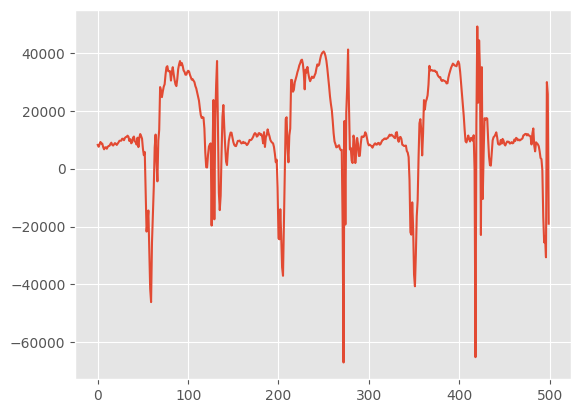

In [ ]:
plt.plot(((np.array(df.loc[2,'Xac000':'Xac499'])
                      + np.array(df.loc[2, 'Yac000':'Yac499'])
                      + np.array(df.loc[2, 'Zac000':'Zac499'])
                      + np.array(df.loc[2, 'RotX000':'RotX499'])
                      + np.array(df.loc[2, 'RotY000':'RotY499'])
                      + np.array(df.loc[2, 'RotZ000':'RotZ499']))))

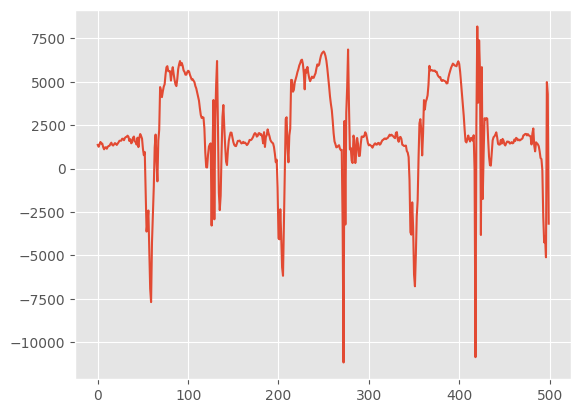

In [ ]:
plt.plot(((np.array(df.loc[2,'Xac000':'Xac499'])
                      + np.array(df.loc[2, 'Yac000':'Yac499'])
                      + np.array(df.loc[2, 'Zac000':'Zac499'])
                      + np.array(df.loc[2, 'RotX000':'RotX499'])
                      + np.array(df.loc[2, 'RotY000':'RotY499'])
                      + np.array(df.loc[2, 'RotZ000':'RotZ499'])))/6)

In [ ]:
def getRandID():

    """
    Retorna um profile_ID aleatório
    """

    profile_ID = list(df_horizontal['profile_ID'])

    Rand_ID = int(random.choice(profile_ID))

    return Rand_ID

def getRandGaitStatus(Rand_ID):

    Rand_GaitStatus = df_horizontal.iloc[Rand_ID-1, 1]

    return Rand_GaitStatus




In [ ]:
def findWAV_filename(path_to_dir, suffix = ".wav"):

    filenames = listdir(path_to_dir)
    return sorted([filename for filename in filenames if filename.endswith( suffix )])

In [ ]:
def MoveWavFiles(filenames):
    """
    Separa e move os arquivos .wav conforme a categoria da marcha (somente MS e MN).
    """

    MS_filenames = []
    MN_filenames = []
    MM_filenames = []

    for filename in filenames:
        if filename[4:6] == "MS":
            MS_filenames.append(filename)
        elif filename[4:6] == "MN":
            MN_filenames.append(filename)
        elif filename[4:6] == "MM":
            MM_filenames.append(filename)

    for filename in MS_filenames:
        os.replace(f"/content/drive/MyDrive/DATA/fulldataset/wav/TwoInOne/{filename}",
                   f"/content/drive/MyDrive/DATA/fulldataset/wav/MS/{filename}")

    for filename in MN_filenames:
        os.replace(f"/content/drive/MyDrive/DATA/fulldataset/wav/TwoInOne/{filename}",
                   f"/content/drive/MyDrive/DATA/fulldataset/wav/MN/{filename}")
    for filename in MM_filenames:
        os.replace(f"/content/drive/MyDrive/DATA/fulldataset/wav/TwoInOne/{filename}",
                   f"/content/drive/MyDrive/DATA/fulldataset/wav/MM/{filename}")

In [ ]:
def raw_toWav(df):

    for currentIndex in range(len(df)):
        eixos = "Gait".split()
        for eixo in eixos:
            obj = wave.open('/content/drive/MyDrive/DATA/fulldataset/wav/TwoInOne/{:0>3}{}_{}.wav'.format(
            df['profile_ID'][currentIndex], df['Gait Status'][currentIndex], (eixo)), 'wb')

            obj.setnchannels(1)
            obj.setsampwidth(2)
            obj.setframerate(100)
            obj.setnframes(30)
            bufferList =  np.array(df.loc[currentIndex, 'Xac000':'RotZ499'])

            for value in bufferList:
                data = struct.pack('<h', value)


                obj.writeframesraw(data)

            obj.close()


In [ ]:
wav_filenames = findWAV_filename('/content/drive/MyDrive/DATA/fulldataset/wav/TwoInOne')


In [ ]:
MoveWavFiles(wav_filenames)

In [ ]:
raw_toWav(df)

In [ ]:
gait_types = 'MM MN MS'.split()

In [ ]:
import os
import shutil

source_folder = '/content/drive/MyDrive/DATA/fulldataset/wav/TwoInOne'
targets = {
    'MS': '/content/drive/MyDrive/DATA/fulldataset/wav/MS',
    'MM': '/content/drive/MyDrive/DATA/fulldataset/wav/MM',
    'MN': '/content/drive/MyDrive/DATA/fulldataset/wav/MN'
}


for folder in targets.values():
    os.makedirs(folder, exist_ok=True)

for filename in os.listdir(source_folder):
    for key, dest_folder in targets.items():
        if key in filename:
            src_path = os.path.join(source_folder, filename)
            dst_path = os.path.join(dest_folder, filename)
            shutil.move(src_path, dst_path)
            break

#Trích xuất đăch trưng

In [ ]:

header = 'filename chroma_stft std_chroma spectral_centroid std_centroid spectral_bandwidth std_bandwidth rolloff std_rolloff zero_crossing_rate std_zcr'
for i in range(1, 21):
    header += f' mfcc{i} std_mfcc{i}'
header += ' label'
header = header.split()

file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for gait in gait_types:
    for filename in os.listdir(f'/content/drive/MyDrive/DATA/fulldataset/wav/{gait}'):
        gaitname = f'/content/drive/MyDrive/DATA/fulldataset/wav/{gait}/{filename}'
        y, sr = librosa.load(gaitname, mono=True, sr=125)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename[:-4].replace(" ", "").replace("-","")} {np.mean(chroma_stft)} {np.std(chroma_stft)} {np.mean(spec_cent)} {np.std(spec_cent)} {np.mean(spec_bw)} {np.std(spec_bw)} {np.mean(rolloff)} {np.std(rolloff)} {np.mean(zcr)} {np.std(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)} {np.std(e)}'
        to_append += f' {gait}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [ ]:
data_features = pd.read_csv('data.csv')
print("\nDữ liệu đặc trưng âm thanh (data.csv) đã tải:")
print(data_features.head())
print(f"Kích thước data_features: {data_features.shape}")


Dữ liệu đặc trưng âm thanh (data.csv) đã tải:
     filename  chroma_stft  std_chroma  spectral_centroid  std_centroid  \
0  011MM_Gait     0.742964    0.164615           7.513857      1.497459   
1  006MM_Gait     0.782167    0.122757           9.977742      1.096018   
2  021MM_Gait     0.774359    0.146164           9.546906      1.365336   
3  016MM_Gait     0.688863    0.247510          13.749560      3.975520   
4  009MM_Gait     0.778711    0.136546           8.157006      1.836140   

   spectral_bandwidth  std_bandwidth    rolloff  std_rolloff  \
0            9.255760       0.868604  14.549255     2.406817   
1           10.714975       0.778918  19.897461     2.075195   
2           10.748692       1.075158  19.363403     3.889375   
3           13.342797       1.991377  30.456543     7.515631   
4            9.840993       1.206134  16.265869     2.585363   

   zero_crossing_rate   std_zcr      mfcc1   std_mfcc1       mfcc2  std_mfcc2  \
0            0.033630  0.007052 -46.

In [ ]:
# Loại bỏ cột 'filename'
data_features = data_features.drop(['filename'], axis=1)

#Chuẩn hóa

In [ ]:

X_features_raw = data_features.iloc[:, :-1].copy()
sound_list = data_features.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(sound_list)
print("Các lớp đã học bởi LabelEncoder:", encoder.classes_)

Các lớp đã học bởi LabelEncoder: ['MM' 'MN' 'MS']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_for_initial_features = MinMaxScaler()
X_scaled_initial = scaler_for_initial_features.fit_transform(X_features_raw)
print(f"\nKích thước X_scaled_initial sau MinMaxScaler ban đầu: {X_scaled_initial.shape}")


Kích thước X_scaled_initial sau MinMaxScaler ban đầu: (420, 50)


In [ ]:
pca = PCA(n_components=50)
df_with_pca = pca.fit_transform(X_scaled_initial)
print(f"Kích thước df_with_pca sau PCA: {df_with_pca.shape}")


Kích thước df_with_pca sau PCA: (420, 50)


In [ ]:
scaler_after_pca = MinMaxScaler(feature_range=(-1, 1))
X_final_for_training = scaler_after_pca.fit_transform(df_with_pca)
print(f"Kích thước X_final_for_training cuối cùng: {X_final_for_training.shape}")


Kích thước X_final_for_training cuối cùng: (420, 50)


#Huấn luyện mô hình

In [ ]:
X = X_final_for_training

In [ ]:
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model = SVC(decision_function_shape='ovo')

scores = cross_val_score(SVC(decision_function_shape = 'ovo', C=100, gamma = 0.01, kernel = 'rbf'), X, y, cv=LeaveOneOut(), scoring= "accuracy")
model.fit(X_train, y_train)
print("\nĐã huấn luyện mô hình SVM.")


Đã huấn luyện mô hình SVM.


#Kiểm thử trên tập dữ liệu 20 training split


--- Ma trận nhầm lẫn trên tập test (từ train_test_split) ---
[[27  0  0]
 [ 5 20  3]
 [ 0  1 28]]

--- Báo cáo phân loại trên tập test (từ train_test_split) ---
              precision    recall  f1-score   support

          MM       0.84      1.00      0.92        27
          MN       0.95      0.71      0.82        28
          MS       0.90      0.97      0.93        29

    accuracy                           0.89        84
   macro avg       0.90      0.89      0.89        84
weighted avg       0.90      0.89      0.89        84



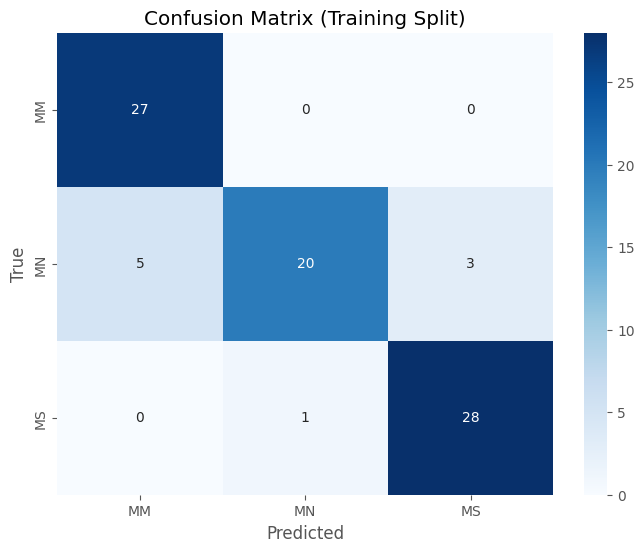

In [ ]:
predictions = model.predict(X_test)

cm = confusion_matrix(y_test, predictions)
print("\n--- Ma trận nhầm lẫn trên tập test (từ train_test_split) ---")
print(cm)
print("\n--- Báo cáo phân loại trên tập test (từ train_test_split) ---")
print(classification_report(y_test, predictions, target_names=encoder.classes_))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Training Split)')
plt.show()

#Lưu mô hình

In [ ]:

import joblib
import os
save_dir = '/content/drive/MyDrive/DATA/trained_model_and_scalers'
os.makedirs(save_dir, exist_ok=True)

joblib.dump(model, os.path.join(save_dir, 'svm_model.joblib'))
joblib.dump(encoder, os.path.join(save_dir, 'label_encoder.joblib'))
joblib.dump(scaler_for_initial_features, os.path.join(save_dir, 'scaler_for_initial_features.joblib'))
joblib.dump(pca, os.path.join(save_dir, 'pca_model.joblib'))
joblib.dump(scaler_after_pca, os.path.join(save_dir, 'scaler_after_pca.joblib'))

print(f"\nĐã lưu mô hình và các đối tượng tiền xử lý vào thư mục: {save_dir}")




Đã lưu mô hình và các đối tượng tiền xử lý vào thư mục: /content/drive/MyDrive/DATA/trained_model_and_scalers
